In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Defining Required Functions 

In [2]:
def obj_func(predictors, response, betas):
    prediction = np.dot(predictors, betas)
    error = np.sum((response - prediction) ** 2)
    return error / (2 * len(error))

In [3]:
def add_intercept(predictors):
    intercept = np.ones((predictors.shape[0],1))
    return np.concatenate((intercept, predictors),axis = 1)

In [4]:
def linear_regressor(predictor, response, learning_rate, num_steps):
    predictors = add_intercept(predictor)
    betas = np.zeros(predictors.shape[1])
    for i in range(num_steps):
        predictions = np.dot(predictors, betas)
        error = predictions - response
        # gradient = np.dot(predictors.T, error)
        for i in range(0,len(betas)):
            betas[i] = betas[i] - learning_rate * (error * predictors[:,i]).mean()
    return betas

In [5]:
def root_mse(y_pred, y_test):
    sse = (y_test - y_pred) ** 2
    mse = sse.mean()
    return np.sqrt(mse)

## Data Loading 

In [6]:
# https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant
# Taking a publicly available dataset to run linear regression
power = pd.read_csv('cycle_power_plant.csv')

## Plotting the correlation of predictors 

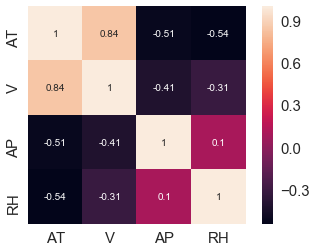

In [7]:
plt.figure
sns.set(font_scale=1.5)
sns.heatmap(power.loc[:,['AT','V','AP','RH']].corr(), square = True, cbar=True, annot=True, annot_kws={'size': 10})
plt.show()

## Data Transformation 

In [8]:
# Splitting into predictors and response variable
X = power.loc[:,['AT','V','AP','RH']]
y = power.loc[:,'PE']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Normalizing the data to reduce effect of any predictor on the regression coefficients
X_train_mean = X_train.mean()
X_train_sd = X_train.std()
X_train_std = (X_train - X_train_mean) / X_train_sd
X_test_std = (X_test - X_train_mean) / X_train_sd
y_train_mean = y_train.mean()
y_train_sd = y_train.std()
y_train_std = (y_train - y_train_mean) / y_train_sd
y_test_std = (y_test - y_train_mean) / y_train_sd

In [9]:
result = linear_regressor(X_train_std, y_train_std, 0.01, 500)

In [10]:
predictors = add_intercept(X_train_std)
y_pred = np.dot(predictors, result)
print('Train Set RMSE: {0}'.format(root_mse(y_pred, y_train_std)))

Train Set RMSE: 0.28981154516452623


In [11]:
predictors = add_intercept(X_test_std)
y_pred = np.dot(predictors, result)
print('Test Set RMSE: {0}'.format(root_mse(y_pred, y_test_std)))

Test Set RMSE: 0.2969033778269969
